## Loading Organized Raw Data

In [10]:
# Importing all required libraries again
from utils import *

EPS = np.finfo(float).eps # Machine precision (to avoid division by zero)

In [11]:
with open("_preproc_data/df_eigenvalues.pkl", 'rb') as f:
    df_eigenvalues = pickle.load(f)
    
df_eigenvalues.head()

Scenario 1             Scenario 2             Scenario 3  \
0   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
1 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
2   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
3 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
4  -999.999779+0.000000j  -999.999785+0.000000j  -999.999826+0.000000j   

              Scenario 4             Scenario 5             Scenario 6  \
0   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
1 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
2   -50.000000+0.000000j   -50.000000+0.000000j   -30.241006+0.000000j   
3 -1000.000000+0.000000j -1000.000000+0.000000j   -50.000000+0.000000j   
4  -999.999816+0.000000j  -999.999821+0.000000j -1000.000000+0.000000j   

              Scenario 7             Scenario 8             Scenario 9  \
0   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
1 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
2   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
3 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
4  -999.999816+0.000000j  -999.999822+0.000000j  -999.999784+0.000000j   

             Scenario 10  ...         Scenario 19806         Scenario 19807  \
0   -50.000000+0.000000j  ...   -50.000000+0.000000j   -50.000000+0.000000j   
1 -1000.000000+0.000000j  ... -1000.000000+0.000000j -1000.000000+0.000000j   
2   -50.000000+0.000000j  ...   -50.000000+0.000000j   -50.000000+0.000000j   
3 -1000.000000+0.000000j  ... -1000.000000+0.000000j -1000.000000+0.000000j   
4  -999.999785+0.000000j  ...  -999.999785+0.000000j  -999.999826+0.000000j   

          Scenario 19808         Scenario 19809         Scenario 19810  \
0   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
1 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
2   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
3 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
4  -999.999811+0.000000j  -999.999785+0.000000j  -999.999822+0.000000j   

          Scenario 19811         Scenario 19812         Scenario 19813  \
0   -50.000000+0.000000j   -50.000000+0.000000j   -50.000000+0.000000j   
1 -1000.000000+0.000000j -1000.000000+0.000000j -1000.000000+0.000000j   
2   -50.000000+0.000000j   -50.000000+0.000000j   -30.241006+0.000000j   
3 -1000.000000+0.000000j -1000.000000+0.000000j   -50.000000+0.000000j   
4  -999.999827+0.000000j  -999.999826+0.000000j -1000.000000+0.000000j   

          Scenario 19814         Scenario 19815  
0   -50.000000+0.000000j   -50.000000+0.000000j  
1 -1000.000000+0.000000j -1000.000000+0.000000j  
2   -50.000000+0.000000j   -50.000000+0.000000j  
3 -1000.000000+0.000000j -1000.000000+0.000000j  
4  -999.999780+0.000000j  -999.999818+0.000000j  

[5 rows x 19815 columns]

## Normalizing Eigenvalues

In [12]:
# Creating new Pandas Dataframe for normalized eigenvalues
df_normalized_eigenvalues = pd.DataFrame([], columns = list(df_eigenvalues.columns.values))

# Function to normalize a single eigenvalue (scalar fcn)
# This has to be conditioned: only the eigs outside the unit circle will be normalized
norm_scalar = lambda eig : (eig / (np.abs(eig) + EPS) if np.abs(eig) >= 1 else eig)

# Vectorizing the lambda expression (vector elementwise fcn)
norm_vector = np.vectorize(norm_scalar)

In [13]:
for sc in list(df_eigenvalues.columns.values):
    df_normalized_eigenvalues[sc] = norm_vector(df_eigenvalues[sc][:])

# Saving the normalized eigenvalues
with open('_preproc_data/df_normalized_eigenvalues.pkl', 'wb') as f:
    pickle.dump(df_normalized_eigenvalues, f, pickle.HIGHEST_PROTOCOL)

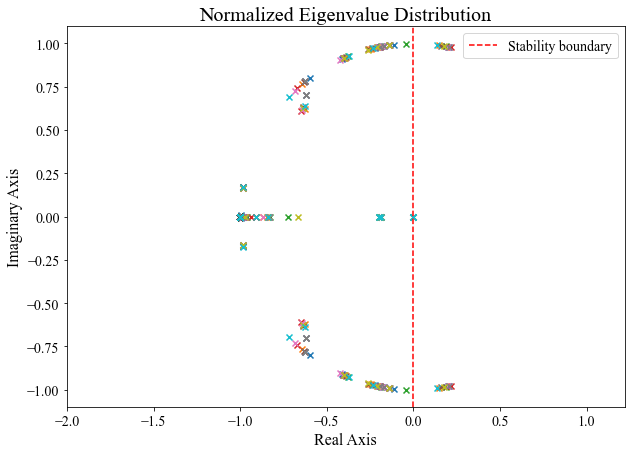

In [8]:
# Selecting 10 random scenarios
plot_scenarios = np.random.randint(1, df_normalized_eigenvalues.shape[1], 10)

# Plotting the eigenvalues for the scenarios
fig, ax = plt.subplots(figsize = (10, 7))

for sc in plot_scenarios:
    real_part = np.real(df_normalized_eigenvalues["Scenario {}".format(sc)][:])
    imag_part = np.imag(df_normalized_eigenvalues["Scenario {}".format(sc)][:])
    ax.scatter(real_part, imag_part, marker = 'x')

ax.set_title('Normalized Eigenvalue Distribution', fontname = 'Times New Roman', fontsize = 20)
ax.set_xlabel('Real Axis', fontname = 'Times New Roman', fontsize = 16)
ax.set_ylabel('Imaginary Axis', fontname = 'Times New Roman', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
    
ax.axvline(x = 0, color = 'red', linestyle = '--', label = 'Stability boundary') # Drawing stability boundary
ax.legend(prop = {'family' : 'Times New Roman', 'size' : 14})

ax.axes.set_aspect('equal', 'datalim')

## Labeling Data

In [9]:
create_ground_truth(df_normalized_eigenvalues, os.getcwd(), 'normalized')

Ground truth data saved!

normalized Eigenvalues (shape): 49 (eigs) x 19815 (scenarios)
normalized Text labels (shape): 49 (eigs) x 19815 (scenarios)
normalized Damping ratio (shape): 49 (eigs) x 19815 (scenarios)
normalized Tag label (shape): 49 (eigs) x 19815 (scenarios)

